# Introduction:

In this lab, we will work with a medical dataset and try to build a model to distinguish between Benign and Malignant tumors with the information given in the dataset. Our model will be a Supervised model as our dataset has a label. Moreover, our label is a binary classification.

## About the data:

This is a medical dataset which includes medical records of 683 tumor. It also includes 10 features regarding each tumor such as their Clump or UnifSize. The last feature given in the dataset, named Class, is binary and given in two's and four's, indicating whether a patient has a Benign, 2, or is a Malignant tumor, 4. We will look more into the data ahead.

## About the model (Random forest Algorithm)


Random forest algorithm is an ensemble learning technique combining numerous classifiers to enhance a model's performance. Random Forest is a supervised machine-learning algorithm made up of decision trees.

# Importing the libraries

The first thing that we need to do is to import all the libraries necessary for our work in this lab.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score

# Calling the data

The data is stored in my system locally so I will just call the data from my hard drive.

In [2]:
df=pd.read_csv("E:/Reza/New folder/Python/Datasets/cell_samples.CSV")
df

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


# Data Cleaning

Before building our model, we need to look into our data carefully to see if there are any modifications that we can do to help build a better model. These modifications could be data cleaning, feature selection, feature extraction, data normalization and.... Here, there is an issue with the data in that it is filled with non numeric data which cannot be processed by the model. What I will now do is to turn these non-numeric data to numeric data:

In [3]:
df.isnull().sum()
#we check and see that there are no missing values in our data

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [4]:
df.dtypes
#we see that a features, BareNuc, is not integer or float and thus cannot be processed by the computer.
#When we look into the data we actually see that BareNuc is a numeric value but there are some data points that cannot be processed by the computer and thus I have to delete them

Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [5]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

# Data Analysis & Data Visualization

Before building the model we will look further into the data to build a good intuition regarding the data. We will also use data visualization tools to help us in building our intuition.

In [6]:
df.describe()
#This code is very useful and will give an overview of the data and where the most data points for each feature is

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


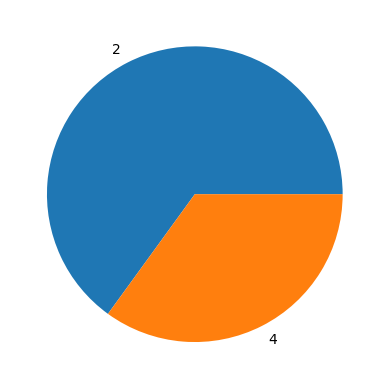

In [7]:
dc= df.value_counts('Class')
plt.pie(dc.values, labels=dc.index);
#With this pie chart, we can see that the occurance of Benign, 2, tumors are significantly more than that of Malignant tumor, 4, in our dataset

In [8]:
corr=df.corr()
corr
#this code is also another very useful and helpful code as it shows the corelation between features and that which feature is effected by which feture to what extend
#For example if we look at the last section of the table ("Class"), we see that 'UnifSize' ,'BareNuc' & 'UnifShape' all are features that have a significant impact on someone having a Benign or Malignant tumor (82%)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
Clump,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
UnifSize,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
UnifShape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
MargAdh,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
SingEpiSize,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
BareNuc,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
BlandChrom,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
NormNucl,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mit,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


<Axes: >

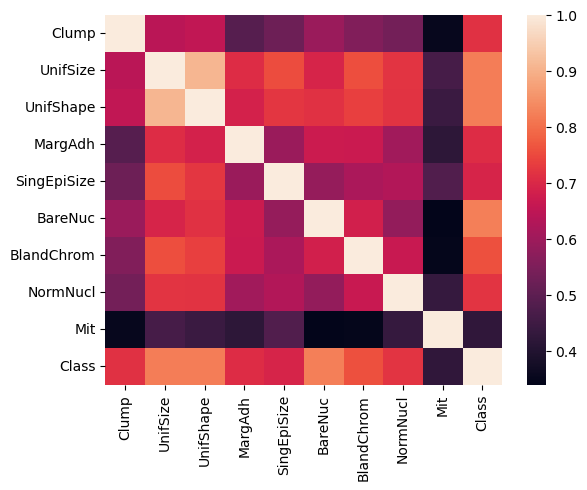

In [9]:
#Again, we can confirm our findings above with a data visualization
#Here we will use the same corelation table from above but in a visualization:
sb.heatmap(corr)

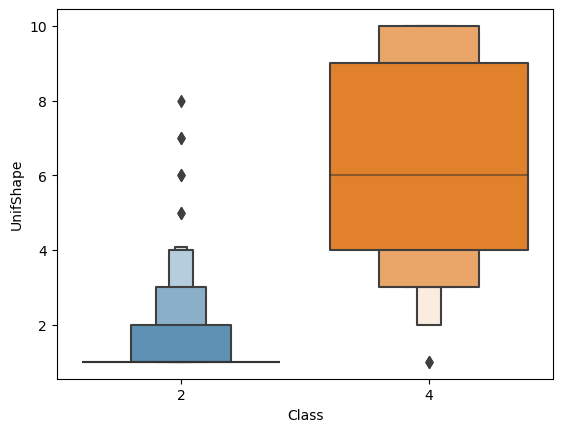

In [10]:
sb.boxenplot(x=df['Class'],y=df['UnifShape'])
plt.show()

# Model

Now, we will build the model. First we will split the data into four parts: X_train(features of the data given to the model to train on and learn from), y_train(given label for the corresponding features in X_train for the computer to train on and learn from), X_test(given features to the computer so the computer would give the labels based on the model and algorithm that it trained on), y_val(the hold-out labels corresponding to the features in the X_val (the real labels for hose records) this is used to test the models accuracy)

In [11]:
#The 'Class' feature is our label so we drop it from our x section which is only the given features
#And our y, which is only the label will be the 'Class'
x=df.drop(['Class'], axis=1)
y=df.Class

#we split the data into the 4 parts mentioned above and use the train size 0.8, meaning that 80% of the data will be trained on and 20% will be used to test our model
X_train, X_val, y_train, y_val= train_test_split(x, y, train_size = 0.8)
#Finally we will use .shape to see shape and size of each part of our data
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((546, 9), (137, 9), (546,), (137,))

# Hyperparameter Optimization

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. Now to this for the random forest algorithm here, I write the parameters with some options and with the use of visualization one can find out what is the best parameter and use it for the model and keep fine tunning the model.

In [13]:
criterion_list = ['gini','entropy']
min_samples_split_list = [1,2,3,5,6,7,8,12,30]#If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,4,6,10,13,18,24,35]
min_samples_leaf_list = [2,3,4,6,9,10,12,16]
n_estimators_list = [10,50,100,500]
RANDOM_STATE=4
X_train, X_val, y_train, y_val= train_test_split(x, y, train_size = 0.8, random_state = RANDOM_STATE)

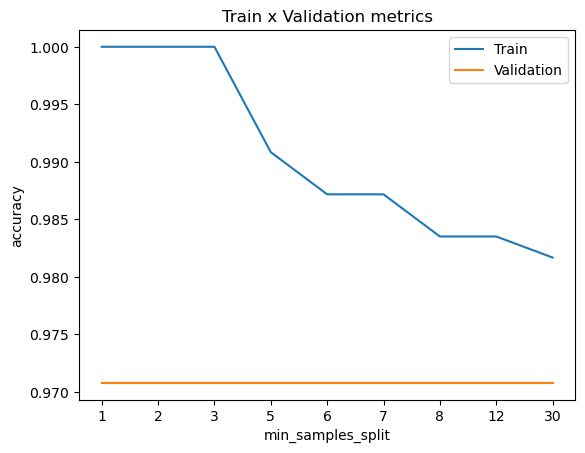

In [14]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

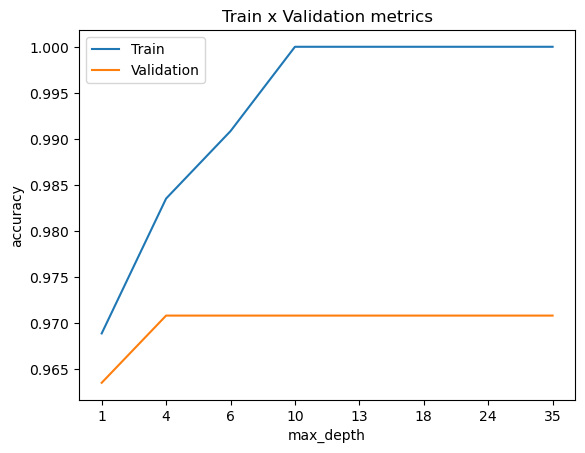

In [15]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

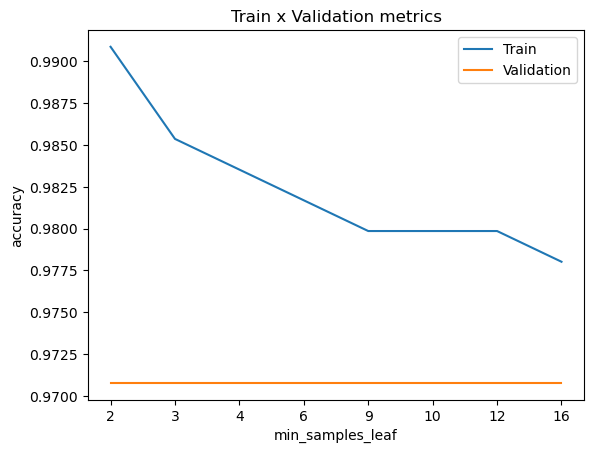

In [16]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_leaf in min_samples_leaf_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_leaf = min_samples_leaf,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_leaf_list )),labels=min_samples_leaf_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

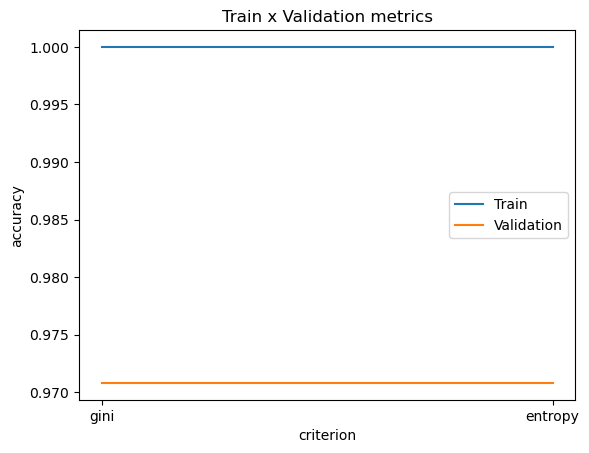

In [17]:
accuracy_list_train = []
accuracy_list_val = []
for criterion in criterion_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(criterion = criterion,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('criterion')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(criterion_list )),labels=criterion_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

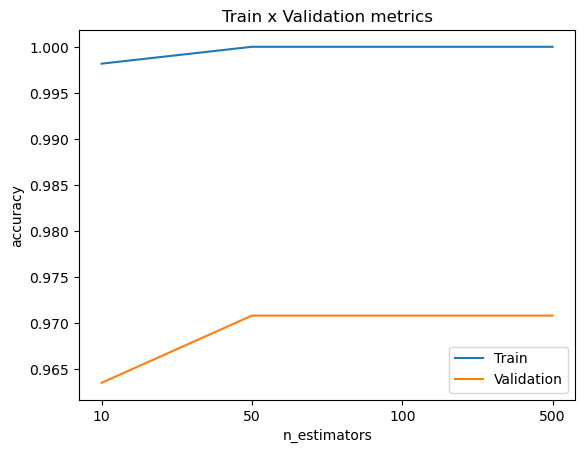

In [18]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Let's then fit a random forest with the following parameters:

 - max_depth: 4
 - min_samples_split: 3
 - min_samples_leaf: 6
 - criterion: 'entropy'
 - n_estimators: 50

In [19]:
#now we fit the the fine tunned parameters into the model
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 4, 
                                             min_samples_split = 3,
                                             min_samples_leaf = 6,
                                             criterion = 'entropy').fit(X_train,y_train)

# Model Evaluation

Here we will test the performance of our model and see how well it has done based on metrics such as accuracy, recall score and...

In [20]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9799
Metrics test:
	Accuracy score: 0.9708


In [21]:
#Here we fit our model on our data and use it to predict
random_forest_model.fit(X_train,y_train)
pred=random_forest_model.predict(X_val)

In [22]:
#Accuracy score checks the accuracy of our model
acc=accuracy_score(y_val,pred)
print('The accuracy of the model is ',acc)

#The code below will evaluate the model's preformance based on Recall score, precision score & F1 score, but before showing the code I will explain what each of them mean:
#Recall score is also known as sensitivity or the true positive rate, The higher the recall score, the better the machine learning model is at identifying both positive and negative examples.
#precision score measures the proportion of positively predicted labels that are actually correct. Precision is also known as the positive predictive value
#F1 score represents the model score as a function of precision and recall score.
#F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall
print (classification_report(y_val, pred))

The accuracy of the model is  0.9708029197080292
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [23]:
#For classification problems, one of the best metrics of evaluating the model is called Confusion matrix
#In a Confusion matrix each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa
#Here I will draw a Confusion matrix for the model to see how our model has done on the data:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[86  4]
 [ 0 47]]


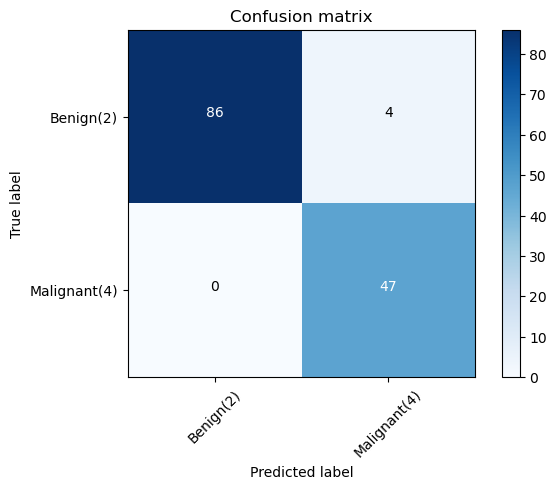

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, pred, labels=[2,4])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

# Conclusion

In this lab we tried to build a Random forest model to predict Benign and Malignant tumors with the given dataset. I made some modifications so that it better fits our model and also analyzed the data to get a better intuition of our data. Finally I evaluated the model with standard well-known classifiction model metrics such as f1 score and Confusion matrix.

# Refrences

Note that I have used codes and peices of information from other sources in this lab such as IBM, Andrew NG (Deeplearning.ai), Coursera platform, Wikipedia website and the https://vitalflux.com/ website.